# <center> Исследование данных HR-агентсва

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Необходимо исследовать данные и сделать выводы по полученным результатам. Подкрепить свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверить, являются ли выводы статистически значимыми.

В процессе своего анализа:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Найти в данных интересные закономерности и отметить их в анализе.

Продемонстрировать использование разных тестов для проверки статистической значимости сделанных выводов:

тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;

тест для категориальных признаков.

Результат работы представить в виде ноутбука (IPYNB-файла) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

Ответить на вопросы помогут данные о зарплатах в сфере Data Science.

Данные содержат следующие столбцы:

- *work_year* — год, в котором была выплачена зарплата;
- *experience_level* — опыт работы на этой должности в течение года: EN — Entry-level/Junior, MI — Mid-level/Intermediate, SE - Senior-level/Expert, EX — Executive-level/Director;
- *employment_type* — тип трудоустройства для этой роли: PT — неполный рабочий день, FT — полный рабочий день, CT - контракт, FL - фриланс;
- *job_title* — роль, в которой соискатель работал в течение года;
- *salary* — общая выплаченная валовая сумма заработной платы;
- *salary_currency* - валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
- *salary_in_usd* — зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
- *employee_residence* — основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
- *remote_ratio* — общий объем работы, выполняемой удалённо: 0 — удалённой работы нет (менее 20%), 50 — частично удалённая работа, 100 — полностью удалённая работа (более 80%);
- *company_location* — страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166;
- *company_size* — среднее количество людей, работавших в компании в течение года: S — менее 50 сотрудников (небольшая компания), M — от 50 до 2500 сотрудников (средняя компания), L - более 250 сотрудников (крупная компания).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [92]:
#Загружаем необходимые библиотека
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [93]:
#Загружаем датасет и проверяем его на работоспособность
ds_salaries = pd.read_csv('data/ds_salaries.csv')

display(ds_salaries.head())
display(ds_salaries.tail())

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [94]:
#Задаем уровень значимости
alpha = 0.05
print(f'Уровень значимости alpha = {alpha}')

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [95]:
#Загрузим общую информацию о датасете
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В исходном датасете 12 признаков, 607 записей (без пропусков), типы данных указаны корректно. Также в датасете имеется 5 числовых признаков и 7 категориальных.

Проверим данные на наличие полных дубликатов:

In [96]:
print('Количество дубликватов: {}'.format(ds_salaries[ds_salaries.duplicated()].shape[0]))



Количество дубликватов: 0


Удалим неинформативные признаки:

In [97]:
ds_salaries.drop(['Unnamed: 0', 'salary', 'salary_currency'],axis=1,inplace=True)
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [98]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


После удаления неинформативных столбцов в датасете осталось 9 признаков, 607 записей (без пропусков), 3 числовых признака и 6 категориальных признаков.

К числовым признакам относятся:
- *work_year*
- *salary_in_usd*
- *remote_ratio* 

К категориалным признакам относятся:
- *experience_level*
- *employment_type*
- *job_title*
- *employee_residence*
- *company_location*
- *company_size*


### Распределение зарплат по всем работникам в сфере Data Science

#

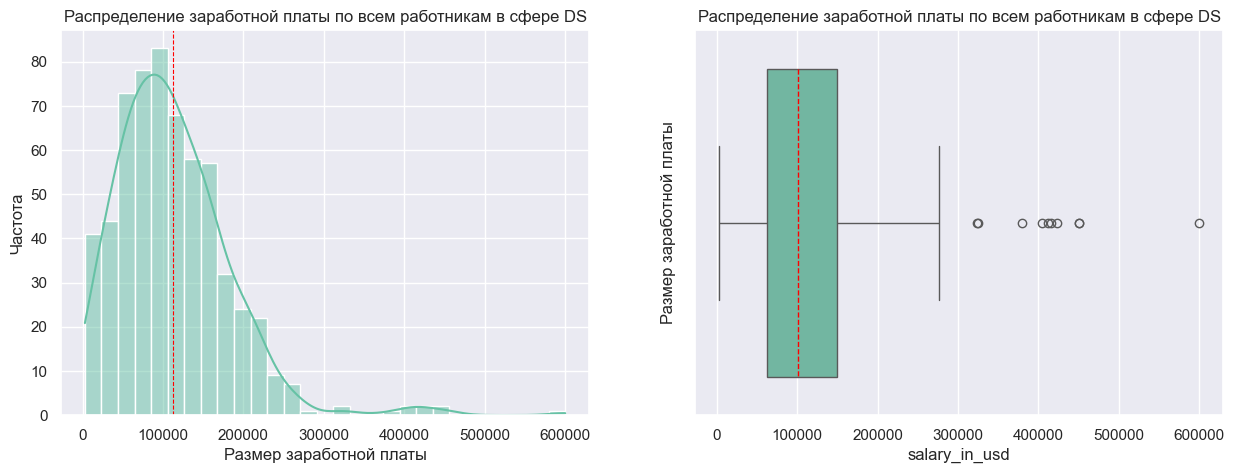

In [99]:
#Строим гистограмму распределения и диаграмму "boxplot"
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns. histplot(ds_salaries['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем работникам в сфере DS')
axes[0].axvline(ds_salaries['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(ds_salaries['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы по всем работникам в сфере DS')

plt.show()

In [ ]:
data_agg = ds_salaries['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер заработной платы']
data_agg

,Рfзмер заработной платы
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


Распределение заработной платы отлично от нормального, имеются выбросы.

### Очистка данных от выбросов при помощи метода z-отклонений

In [101]:
#Определим численный показатель ассиметрии
print(np.log(ds_salaries['salary_in_usd'] + 1).skew())

-1.2609004767569614


In [102]:
#Реализуем метод z-отклонения
def outliers_z_score(data, feature, left = 3, right = 3, log_scale=False):

    if log_scale:
        x = np.log(data[feature] + 1)
    else: 
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outlies = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outlies, cleaned

outliers, cleaned = outliers_z_score(ds_salaries, 'salary_in_usd')
print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонений: 8
Результирующее число записей: 599


Методом z-отклонений было найдено 8 выбросов. Используем очищенный датасет в дальнейшем.

In [103]:
#Перезапишем наш датасет
ds_salaries = cleaned

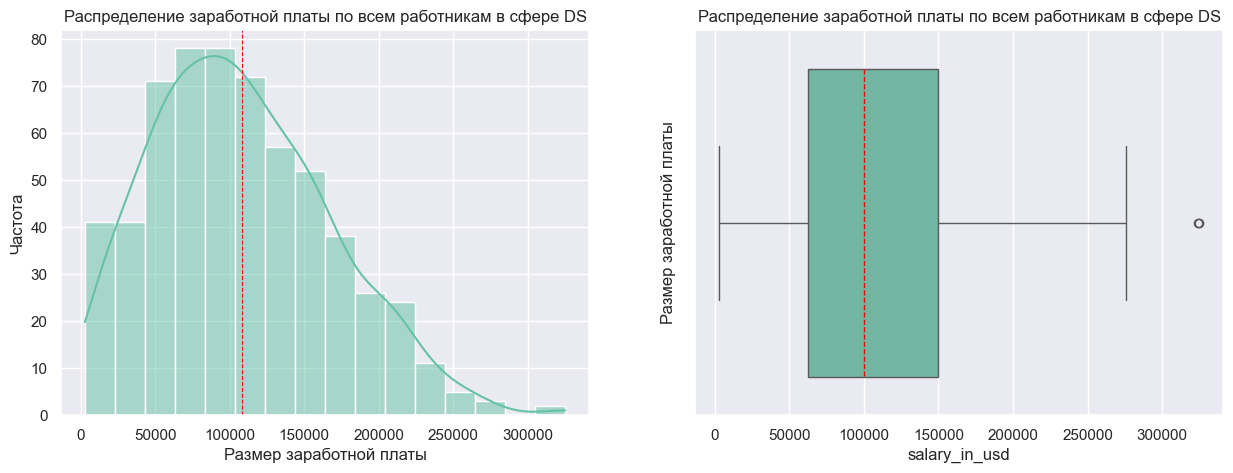

In [104]:
#Построим гистограмму и диаграмму "boxplot" по очищенному датасету
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns. histplot(ds_salaries['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем работникам в сфере DS')
axes[0].axvline(ds_salaries['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(ds_salaries['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы по всем работникам в сфере DS')

plt.show()

## Базовый анализ числовых признаков

In [120]:
#Построим гистограмму по году выплаты заработной платы
fig = px.histogram(
    data_frame=ds_salaries,
    x='work_year',
    title='Распределение года выплаты по всем работникам в сфере DS',
    width=1000,
    height=600,
    nbins=len(ds_salaries['work_year'].unique()),
    histfunc='count'
)
fig.update_xaxes(
    title_text='Год выплаты',
    tickmode='array',
    tickvals=sorted(ds_salaries['work_year'].unique()),
    ticktext=[str(year) for year in sorted(ds_salaries['work_year'].unique())]
)
fig.update_yaxes(title_text='Частота')
fig.show()

Из гистограммы видно, что с каждым годом, количество выплат заработной платы становиться больше. Это может быть связано с увеличением количества работников каждый год.

In [125]:
#Построим гистограмму по признаку объема работы, выполняемой удаленно
fig = px.histogram(
    data_frame=ds_salaries,
    x='remote_ratio',
    title='Распределение объема удаленной работы по всем работникам в сфере DS',
    width=1000,
    height=600,
    nbins=len(ds_salaries['remote_ratio'].unique()),
    histfunc='count'
)
fig.update_xaxes(
    title_text='Объем удаленной работы, %',
    tickmode='array',
    tickvals=sorted(ds_salaries['remote_ratio'].unique()),
    ticktext=[str(ratio) for ratio in sorted(ds_salaries['remote_ratio'].unique())]
)
fig.update_yaxes(title_text='Частота')
fig.show()


In [113]:
data_agg = ds_salaries['remote_ratio'].describe().round(2).to_frame()
data_agg.columns = ['Размер заработной платы']
data_agg

,Размер заработной платы
count,599.00
mean,70.78
std,40.76
min,0.00
25%,50.00
50%,100.00
75%,100.00
max,100.00
